<a href="https://colab.research.google.com/github/mscampb4-ncsu/Homework5/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5
Author: Max Campbell

## Part I - Concepts

### Question 1 - The Five V's

The "Five V's of Big Data" are listed as: volume, variety, velocity, veracity (or variability), and value. A good example of how these concepts are realized in practice takes place at my current job. I am an anti-money laundering (AML) analyst, and it follows that I end up working with financial data in my day-to-day work. Specifically:

  * Volume - a large bank can have millions of customers, all conducting transactions on a daily basis.
  * Variety - regulatory requirements necessitate that the bank needs to have records on every customer, the transactions that take place in their accounts, as well as various other datasets that are maintained for different fields of work within the bank.
  * Velocity - a bank needs to be able to process records quickly and securely in order to meet regulatory standards on the safety of their transactions as well as mechanisms such as preventing financial crimes from occurring within their accounts.
  * Veracity - specific to AML, constant work is needed to maintain the accuracy of databases at the highest reasonable levels, especially as records can become inaccurate with user input which can lead to serious concerns about various financial crimes being overlooked in worst case scenarios.
  * Value - numerous insights can be generated from the data generated by a bank. To name a few, a bank may consider attempting to understand the geographic areas that it has the largest concentration of customers holding accounts to understand where it has an established foothold or identify opportunities to open more branches. Specific to AML, a bank may use transactional data to flag bank accounts for common indicators of financial crime, allowing for more efficient methods of detecting such crimes.

### Question 2 - CRUD

In the context of the baseball archive dataset, a Create, Read, Update, Delete (CRUD) process could apply as follows:

  * **C**reate - when the database was first created, the individual tables needed to be created. For example, a table was likely created in order to store the box scores of each game.
  * **R**ead - this occurs when the user selects the data that they wish to view. For example, a user can select all of the games that occurred in the 2021 MLB season.
  * **U**pdate - this occurs if the records being viewed are modified. For example, the user may have (hypothetically) spotted entries where the team's name was missing. The user could then set the missing team name to the correct string.
  * **D**elete - this occurs when records or tables are being removed from the database. For example, the user may choose to delete records from the table where the box scores were missing due to the game getting postponed.

### Question 3 - The HAVING Clause

When using the SELECT statement to view, update, or delete data, the HAVING clause defines a condition that must be met for a given group of data for the SELECT statement to return the entry. This is preceded by the GROUP BY statement as the information provided by grouping the data is what is tested by the condition. Using the baseball archive as a dataset, one may want to gather data that is specific to a given team, so they would GROUP BY the team variable and then specify the team's name or id under the HAVING clause.

## Part II - Simulation of a Sampling Distribution


Assuming a simple linear regression, we can "bootstrap" a sampling distribution by generating a large sample of estimates for the parameters of interest and analyzing the properties of those estimates. To start, we randomly generate some data to create a dataset and fit it to a basic SLR using some assumed values for the beta parameters and the sample size:

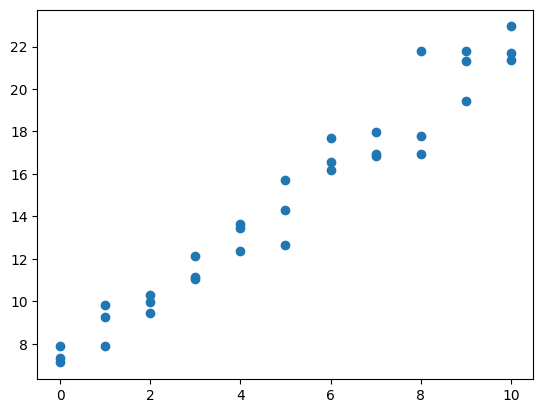

In [ ]:
#Copy in code from HW5 assignment
#import some modules needed
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
rng = default_rng(32)
beta_0 = 7
beta_1 = 1.5
# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = 33
#create the 'responses' modeled from the line plus a random deviation
y = beta_0 + beta_1*x + rng.standard_normal(n)
#visualize the data
plt.scatter(x = x, y = y)
plt.show()

Next, we can use the `sklearn` module to estimate a SLR and save whichever estimates we find interesting. In this case, we will be saving the slope estimate.

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x.reshape(-1, 1), y)
reg.coef_[0] #Outputs the slope

np.float64(1.4745056382493755)

Now that we've seen how the basic process works, we do this many times:

In [ ]:
# Repeat the above process 5000 times
estimates = []
for i in range(5000):
  y = beta_0 + beta_1*x + rng.standard_normal(n)
  reg.fit(x.reshape(-1, 1), y)
  estimates.append(reg.coef_[0])

Let's see how the estimates are distributed:

(array([  1.,   1.,   0.,   2.,   5.,   9.,   8.,  34.,  34.,  48.,  89.,
        113., 165., 189., 237., 320., 333., 413., 393., 407., 420., 345.,
        316., 284., 231., 181., 143., 106.,  74.,  43.,  19.,  14.,   9.,
          7.,   1.,   2.,   2.,   0.,   1.,   1.]),
 array([1.28150891, 1.29286042, 1.30421192, 1.31556343, 1.32691494,
        1.33826644, 1.34961795, 1.36096945, 1.37232096, 1.38367247,
        1.39502397, 1.40637548, 1.41772699, 1.42907849, 1.44043   ,
        1.4517815 , 1.46313301, 1.47448452, 1.48583602, 1.49718753,
        1.50853903, 1.51989054, 1.53124205, 1.54259355, 1.55394506,
        1.56529656, 1.57664807, 1.58799958, 1.59935108, 1.61070259,
        1.6220541 , 1.6334056 , 1.64475711, 1.65610861, 1.66746012,
        1.67881163, 1.69016313, 1.70151464, 1.71286614, 1.72421765,
        1.73556916]),
 <BarContainer object of 40 artists>)

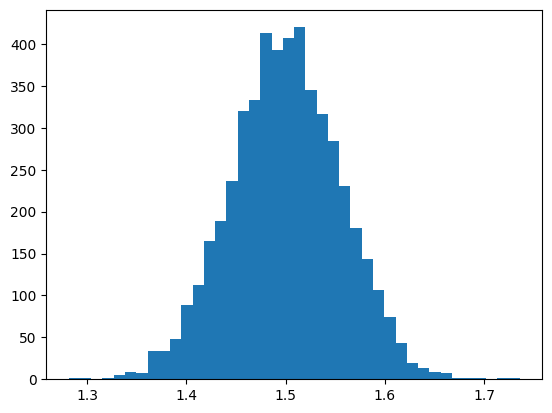

In [ ]:
#Create a histogram of the slope estimator
plt.hist(estimates, bins = 40)

Seems that the estimates roughly centered around the 1.5 mark, which is to be expected as that is the value we assumed for `beta_1`. The applications of this method are very useful. For example, we can derive a 'p-value' by looking at how often our simulation estimated the slope to be above 1.65.

In [ ]:
#Derive proportion of estimators that were above 1.65
prob = sum(1 for i in estimates if i >= 1.65) / 5000
print(prob)

0.0038


We see above that from our sample, there is a 0.38% chance that a given value from the sample was greater than or equal to 1.65. In hypothesis testing, this can be beneficial as deriving this probability can tell us how likely it is that we are operating under the null distribution or if we need to reject it in favor of an alternative hypothesis. In this case, the odds are pretty low that the true slope is greater than or equal to 1.65, so we would likely fail to reject the null hypothesis.

## Part III - Big Data Examples & Rare Events

### Question 1 - Bias in ML Models

A form of bias described in the article was reporting bias, which is where the frequency of which the actions, outcomes, or properties related to various data is not reflective of the real-world proportion of which said property is a characteristic to a group of people. An example mentioned in the article is that eBay had documented 99% of it's user feedback as "positive" in 2008. While it is theoretically possible that eBay figured out the (nearly) perfect user experience, it is more like that the statement is not representative of the users which had a negative experience using eBay.
A way to augment the data being used to make this statement could involve a more comprehensive approach that measured behavioral indicators. For example, one could track the time it took between a user entering the website to the time at which that user made a payment. A lower time for this metric could be an indicator of a user interface that is intuitive or easy to use for one individual over another, thus increasing the likelihood of the user having a positive experience. Other metrics would include the success rate of key tasks, such as making a purchase in eBay's case.

### Question 2 - Big Data in Earth Science

Big data is being used in hydrology to understand key processes related to surface waters that aren't easily obtainable through more traditional methods due to the natural volatility of such waters and the fact that satellites can't accurately depict the depths of these waters. For example, big data is being used to build models that can accurately quantify terrestrial water budgets.
Potential biases that can come into account include a sampling bias. It will be easier to put new tools to gather data in places where the finances and the geopolitical climate is amenable to large-scale projects such as the ones necessary to gather hydrology data at a global scale.

### Question 3 - Superbolts

In public health, understanding the nature of rare diseases and how learning how they spread amongst people or animals is critically important in order to prevent future spread, lest they become common diseases.

## Part IV - Querying a Database

Now, let's do some exploratory analysis on the baseball archive data mentioned previously using SQL! First, we will read in the data and see what we have to work with.



In [ ]:
#Connect to the database file
import sqlite3
import pandas as pd
con = sqlite3.connect("lahman_1871-2022.sqlite")
schema = pd.read_sql("SELECT * FROM sqlite_schema WHERE type = 'table'" , con)
schema

,type,name,tbl_name,rootpage,sql
0,table,AllstarFull,AllstarFull,2,"CREATE TABLE AllstarFull (\nplayerID TEXT,\nye..."
1,table,Appearances,Appearances,3,"CREATE TABLE Appearances (\nyearID INTEGER,\nt..."
2,table,AwardsManagers,AwardsManagers,4,"CREATE TABLE AwardsManagers (\nplayerID TEXT,\..."
3,table,AwardsPlayers,AwardsPlayers,5,"CREATE TABLE AwardsPlayers (\nplayerID TEXT,\n..."
4,table,AwardsShareManagers,AwardsShareManagers,6,CREATE TABLE AwardsShareManagers (\nawardID TE...
5,table,AwardsSharePlayers,AwardsSharePlayers,7,CREATE TABLE AwardsSharePlayers (\nawardID TEX...
6,table,Batting,Batting,8,"CREATE TABLE Batting (\nplayerID TEXT,\nyearID..."
7,table,BattingPost,BattingPost,9,"CREATE TABLE BattingPost (\nyearID INTEGER,\nr..."
8,table,CollegePlaying,CollegePlaying,10,"CREATE TABLE CollegePlaying (\nplayerID TEXT,\..."
9,table,Fielding,Fielding,11,"CREATE TABLE Fielding (\nplayerID TEXT,\nyearI..."


The first thing we want to look at is the `Teams` table. Specifically, we want to see which teams played in 2015.

In [ ]:
#Get all teams that played in 2015
current_input = '''
  SELECT *
  FROM Teams
  WHERE yearID = '2015'
  '''

output = pd.read_sql(current_input, con)
output

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,2015,AL,BAL,BAL,E,3,162,78,81,81,...,134,0.987,Baltimore Orioles,Oriole Park at Camden Yards,2281202,103,104,BAL,BAL,BAL
1,2015,AL,BOS,BOS,E,5,162,81,78,84,...,148,0.984,Boston Red Sox,Fenway Park II,2880694,104,107,BOS,BOS,BOS
2,2015,AL,CHA,CHW,C,4,162,81,76,86,...,159,0.983,Chicago White Sox,U.S. Cellular Field,1755810,92,93,CHW,CHA,CHA
3,2015,AL,CLE,CLE,C,3,161,80,81,80,...,136,0.987,Cleveland Indians,Progressive Field,1388905,106,106,CLE,CLE,CLE
4,2015,AL,DET,DET,C,5,161,81,74,87,...,165,0.986,Detroit Tigers,Comerica Park,2726048,97,98,DET,DET,DET
5,2015,AL,HOU,HOU,W,2,162,81,86,76,...,131,0.986,Houston Astros,Minute Maid Park,2153585,97,99,HOU,HOU,HOU
6,2015,AL,KCA,KCR,C,1,162,81,95,67,...,138,0.985,Kansas City Royals,Kauffman Stadium,2708549,104,103,KCR,KCA,KCA
7,2015,AL,LAA,ANA,W,3,162,81,85,77,...,108,0.984,Los Angeles Angels of Anaheim,Angel Stadium of Anaheim,3012765,94,95,LAA,ANA,ANA
8,2015,AL,MIN,MIN,C,2,162,81,83,79,...,150,0.986,Minnesota Twins,Target Field,2220054,103,104,MIN,MIN,MIN
9,2015,AL,NYA,NYY,E,2,162,81,87,75,...,135,0.985,New York Yankees,Yankee Stadium III,3193795,99,101,NYY,NYA,NYA


Next, let's look at some information about players in the Hall of Fame. Specifically, we want to know what year they were inducted and for what reason.

In [ ]:
#Get Hall of Famers
current_input = '''
  SELECT playerID, yearID, category
  FROM HallOfFame
  WHERE inducted = 'Y'
  '''

output = pd.read_sql(current_input, con)
output

,playerID,yearid,category
0,aaronha01,1982,Player
1,alexape01,1938,Player
2,alomaro01,2011,Player
3,alstowa01,1983,Manager
4,andersp01,2000,Manager
...,...,...,...
335,yastrca01,1989,Player
336,yawketo99,1980,Pioneer/Executive
337,youngcy01,1937,Player
338,youngro01,1972,Player


Next, we want to know how many different people have managed the Pittsburgh Pirates over the years.

In [ ]:
#Get managers of the Pittsburgh Pirates
current_input = '''
  SELECT DISTINCT playerID
  FROM Managers
  WHERE teamID = 'PIT'
  '''

output = pd.read_sql(current_input, con)
output

,playerID
0,bezdehu99
1,bragabo01
2,buckeal99
3,burnsto01
4,burwebi01
5,bushdo01
6,callani01
7,clarkfr01
8,davissp01
9,donovpa01


Looks like there's been 41 managers. Now, let's try and figure out how many of these people where inducted into the hall of fame!

In [ ]:
#Get managers who are Hall of Famers
current_input = '''
  SELECT DISTINCT h.playerID
  FROM HallOfFame AS h
  INNER JOIN Managers AS m
    ON h.playerID = m.playerID
  WHERE h.inducted = 'Y'
  '''

output = pd.read_sql(current_input, con)
print("Number of people who managed a team that are hall of famers:", output.size)

Number of people who managed a team that are hall of famers: 97


Now, we want to now how these managers performed! We will get the wins, losses, and games managed per season for each of the 97 managers above!

In [ ]:
#Get W-L records for managers who are hall of famers
current_input = '''
  SELECT m.playerID, m.G, m.W, m.L
  FROM Managers AS m
  INNER JOIN HallOfFame AS h
    ON m.playerID = h.playerID
  WHERE h.inducted = 'Y'
  '''

output = pd.read_sql(current_input, con)
output

,playerID,G,W,L
0,alstowa01,154,92,62
1,alstowa01,154,98,55
2,alstowa01,154,93,61
3,alstowa01,154,84,70
4,alstowa01,154,71,83
...,...,...,...,...
991,wrighha01,46,22,23
992,wrighha01,138,68,69
993,wrighha01,155,87,66
994,wrighha01,133,72,57


Those are some impressive records! Now, let's see how their overall records compare. First, we will calculate the overall wins and losses for each manager. Then, we will calculate their winning percentage as `Wins / (Wins + Losses)`, and then finally we will sort by the highest to lowest winning percentage to see who was most successful!

In [93]:
#Get W-L records for managers who are hall of famers
current_input = '''
  SELECT
    m.playerID,
    SUM(m.G) as G,
    SUM(m.W) as W,
    SUM(m.L) as L,
    (CAST(SUM(m.W) as FLOAT) / (SUM(m.W) + SUM(m.L))) as WLPercent
  FROM Managers AS m
  INNER JOIN HallOfFame AS h
    ON m.playerID = h.playerID
  WHERE h.inducted = 'Y'
  GROUP BY m.playerID
  ORDER BY WLPercent DESC
  '''

output = pd.read_sql(current_input, con)
output

,playerID,G,W,L,WLPercent
0,simmote01,1,1,0,1.000000
1,wrighge01,85,59,25,0.702381
2,spaldal01,126,78,47,0.624000
3,mccarjo99,3487,2125,1333,0.614517
4,comisch01,1410,840,541,0.608255
...,...,...,...,...,...
92,bottoji01,78,21,56,0.272727
93,applilu01,40,10,30,0.250000
94,baineha01,4,1,3,0.250000
95,wagneho01,5,1,4,0.200000


Putting aside the outlier who won the only game they managed, it looks like `wrighge01` (otherwise known as George Wright), was the manager with the highest winning percentage. Baseball Reference shows that this was accomplished in the [1879 season with the Providence Grays](https://www.baseball-reference.com/managers/wrighge01.shtml). Note that the manager wins column was cast as a float in the numerator of the operation to derive `WLPercent` to avoid any loss of decimal precision in the resulting output.